In [1]:
import pandas as pd
import seaborn as sns
import matplotlib 
from matplotlib import pyplot as plt
import numpy as np

In [16]:
df=pd.read_csv('noshowappointments-kagglev2-may-2016.csv')

# The Data Cleaning Process

In [3]:
df.columns

Index(['PatientId', 'AppointmentID', 'Gender', 'ScheduledDay',
       'AppointmentDay', 'Age', 'Neighbourhood', 'Scholarship', 'Hipertension',
       'Diabetes', 'Alcoholism', 'Handcap', 'SMS_received', 'No-show'],
      dtype='object')

In [6]:
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighbourhood,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received,No-show
0,2.987250e+13,5642903,F,2016-04-29T18:38:08Z,2016-04-29T00:00:00Z,62,JARDIM DA PENHA,0,1,0,0,0,0,No
1,5.589978e+14,5642503,M,2016-04-29T16:08:27Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,0,0,0,0,0,No
2,4.262962e+12,5642549,F,2016-04-29T16:19:04Z,2016-04-29T00:00:00Z,62,MATA DA PRAIA,0,0,0,0,0,0,No
3,8.679512e+11,5642828,F,2016-04-29T17:29:31Z,2016-04-29T00:00:00Z,8,PONTAL DE CAMBURI,0,0,0,0,0,0,No
4,8.841186e+12,5642494,F,2016-04-29T16:07:23Z,2016-04-29T00:00:00Z,56,JARDIM DA PENHA,0,1,1,0,0,0,No


In [ ]:
df.isnull().sum()#the dataset has no null value

In [ ]:
df[df.duplicated()] # there are no duplicated values

In [8]:
df.dtypes

PatientId         float64
AppointmentID       int64
Gender             object
ScheduledDay       object
AppointmentDay     object
Age                 int64
Neighbourhood      object
Scholarship         int64
Hipertension        int64
Diabetes            int64
Alcoholism          int64
Handcap             int64
SMS_received        int64
No-show            object
dtype: object

In [9]:
df.corr()

,PatientId,AppointmentID,Age,Scholarship,Hipertension,Diabetes,Alcoholism,Handcap,SMS_received
PatientId,1.000000,0.004039,-0.004139,-0.002880,-0.006441,0.001605,0.011011,-0.007916,-0.009749
AppointmentID,0.004039,1.000000,-0.019126,0.022615,0.012752,0.022628,0.032944,0.014106,-0.256618
Age,-0.004139,-0.019126,1.000000,-0.092457,0.504586,0.292391,0.095811,0.078033,0.012643
Scholarship,-0.002880,0.022615,-0.092457,1.000000,-0.019729,-0.024894,0.035022,-0.008586,0.001194
Hipertension,-0.006441,0.012752,0.504586,-0.019729,1.000000,0.433086,0.087971,0.080083,-0.006267
Diabetes,0.001605,0.022628,0.292391,-0.024894,0.433086,1.000000,0.018474,0.057530,-0.014550
Alcoholism,0.011011,0.032944,0.095811,0.035022,0.087971,0.018474,1.000000,0.004648,-0.026147
Handcap,-0.007916,0.014106,0.078033,-0.008586,0.080083,0.057530,0.004648,1.000000,-0.024161
SMS_received,-0.009749,-0.256618,0.012643,0.001194,-0.006267,-0.014550,-0.026147,-0.024161,1.000000


In [20]:
df.Age.describe()#Age column has abnormal values like -1,0 which must be droped

count    87269.000000
mean        45.431929
std         18.447618
min         15.000000
25%         30.000000
50%         45.000000
75%         59.000000
max        115.000000
Name: Age, dtype: float64

In [18]:
younger_age=df[df.Age <15].index # ages less than 15 are most likely not to display hipentension and diabeties so i dropped rows with these ages

In [19]:
df.drop(younger_age,inplace=True)

# Performing the Explorative Analysis 

This pairplot shows that there is no strong correlation between the numerical columns

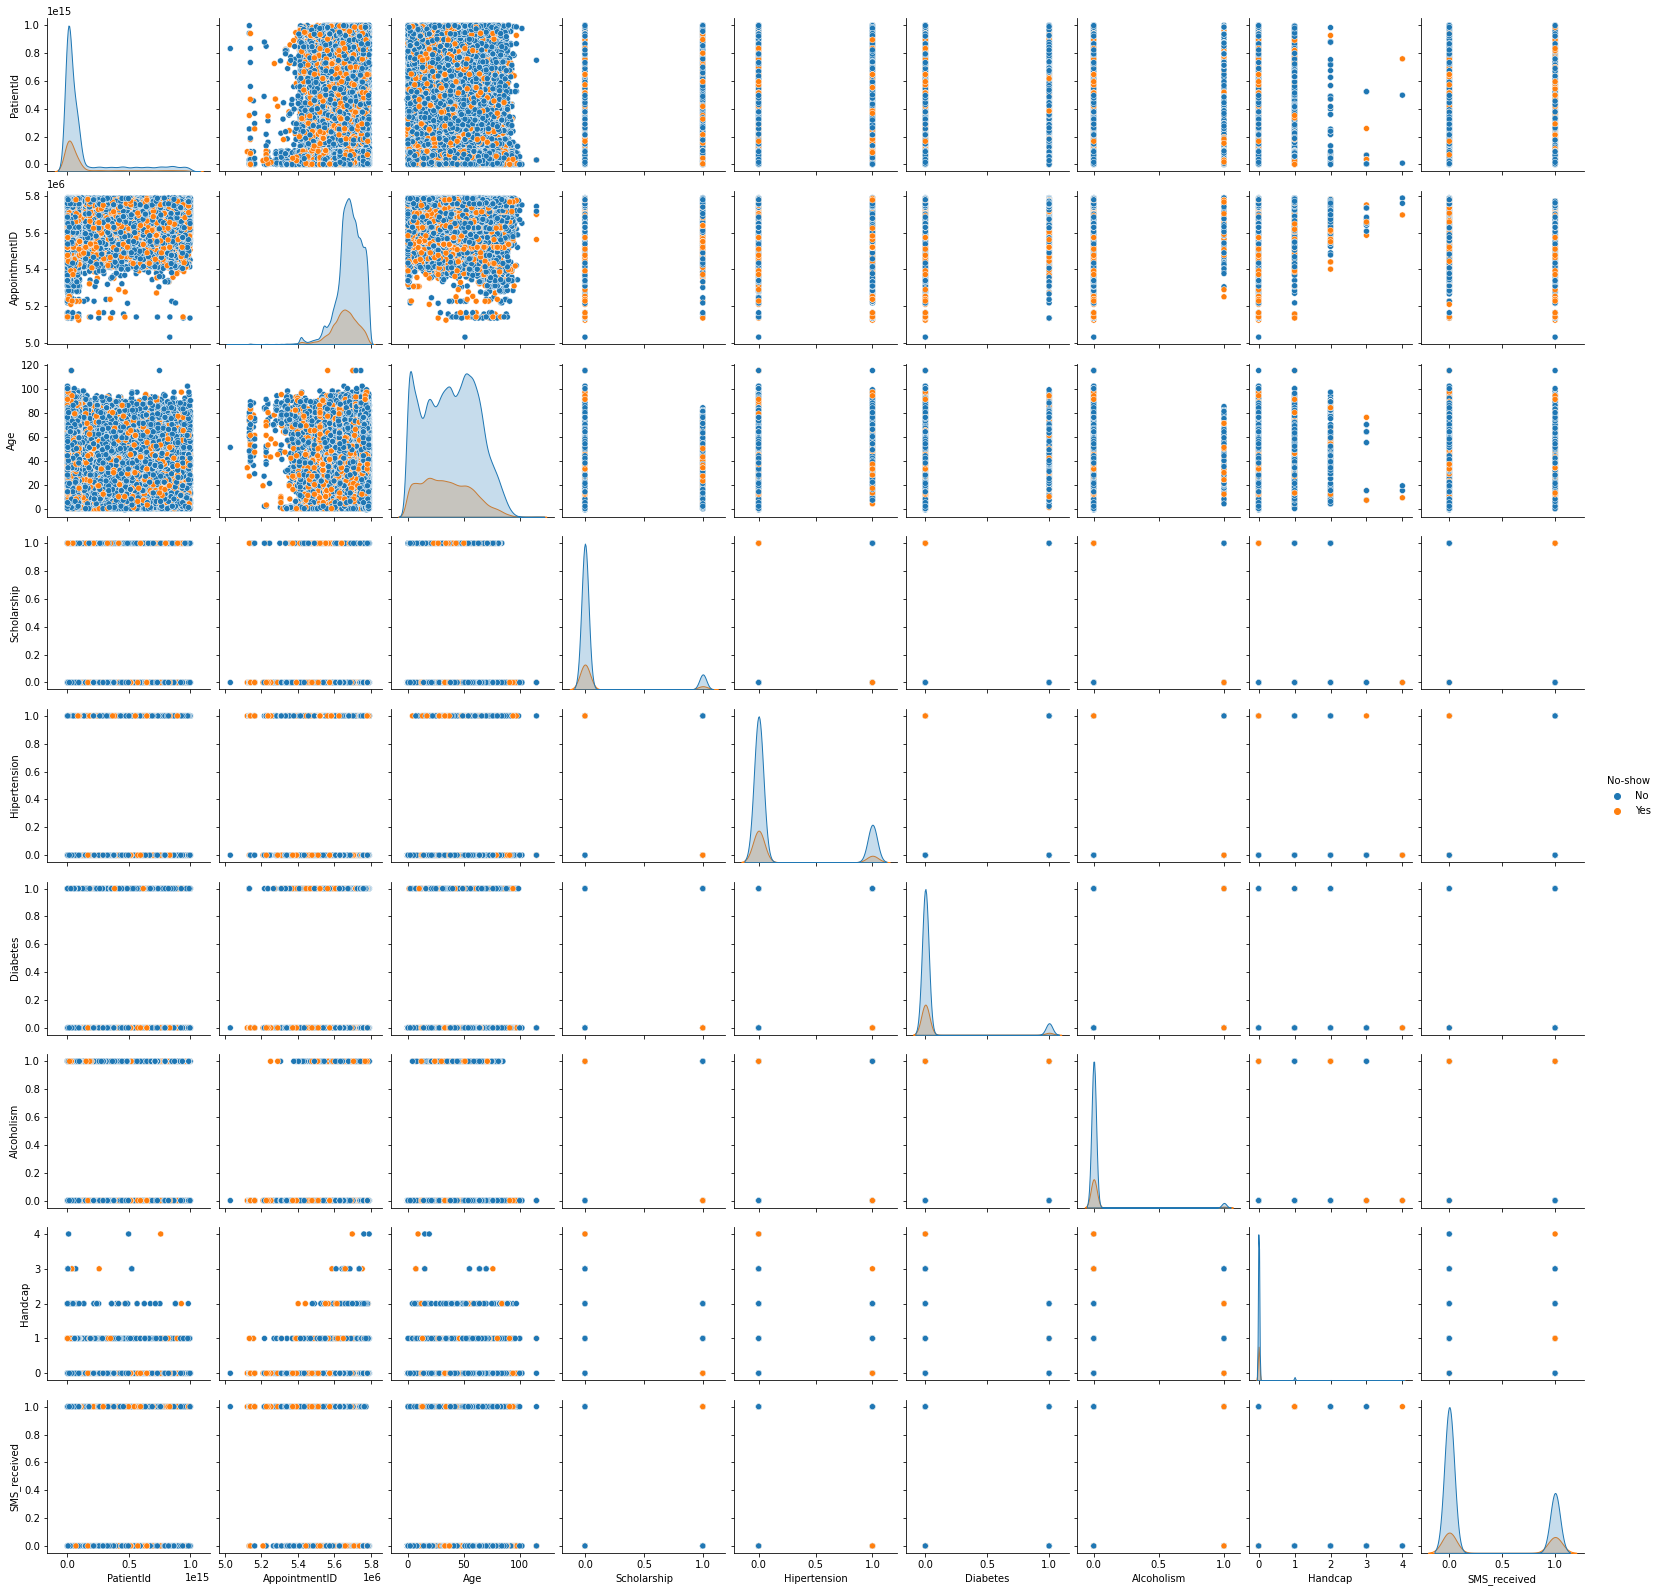

In [24]:
sns.pairplot(data=df,hue='No-show')

The barplot below shows that those that have scholarship tend to show up for appointment than those without scholarship

<AxesSubplot:xlabel='No-show', ylabel='Scholarship'>

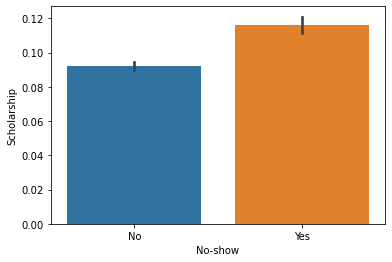

In [24]:
sns.barplot(data=df,x='No-show',y='Scholarship').set_title('Graph of Scholarship Againt Appointment Show Up')

<AxesSubplot:xlabel='No-show', ylabel='Age'>

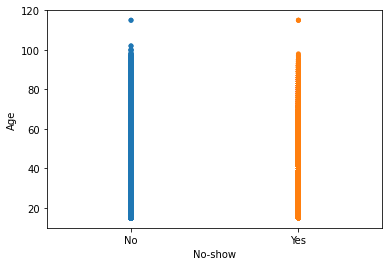

In [27]:
sns.stripplot(data = df , x = "No-show" , y = "Age",jitter=False)

This barchart shows that patients that received sms notification showed up for appointment more those who didn't recieve any notification

Text(0.5, 1.0, 'Graph of Appointment Show Up With Respect To SMS Notification')

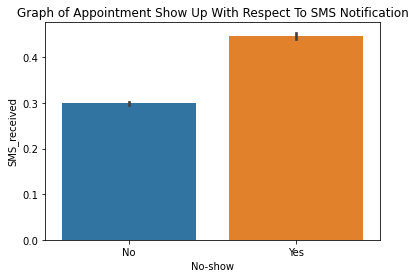

In [37]:
sns.barplot(data = df , x = "No-show" , y = "SMS_received").set_title('Graph of Appointment Show Up With Respect To SMS Notification')

The graph shows that patients of younger age tends to show up for appointment than older patients

Text(0.5, 1.0, 'Graph of Age Againt Appointment Show Up')

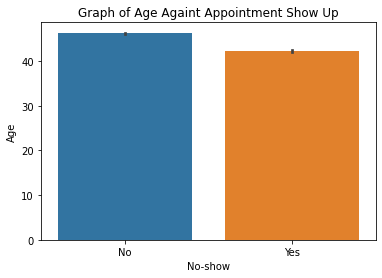

In [36]:
sns.barplot(data=df,x='No-show',y='Age').set_title('Graph of Age Againt Appointment Show Up')